In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_build import load_data

In [2]:
#attempt to predict wins with teamcomp info
df = load_data(table="match_features")

In [3]:
df.head()

,puuid,championId,item0,item1,item2,item3,item4,item5,item6,kills,...,enemy_burst,enemy_engage,enemy_disengage,enemy_healing,enemy_Assassin,enemy_Fighter,enemy_Mage,enemy_Marksman,enemy_Support,enemy_Tank
0,nTDxqpCr7r2UtPosopEiwGdJErsChRyDeb5Fd8g_tigfWl...,51,3006,6671,2421,1038,3072,3031,3363,16,...,9.0,6.0,2.0,6.0,3.0,2.0,2.0,1.0,1.0,0.0
1,Vfwm1_N2gugTKkgOTt_nc6SNiHlLJt5DpWFvnV9g2ovysq...,83,3123,3133,3044,3047,1011,3077,3340,1,...,9.0,9.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0
2,z4eiZukJBUjqAjUOZOZt9cwvkRhBSQrL7alojbZNAFW0P1...,39,6673,3047,3153,3110,3091,0,3340,13,...,7.0,5.0,4.0,4.0,2.0,2.0,1.0,2.0,1.0,0.0
3,8rsE04JkhSIEMZClYF60cBN7b9GJENmbcLlqUjhT4YIMO0...,136,3040,6657,3116,3020,1058,0,3340,11,...,7.0,5.0,4.0,4.0,2.0,2.0,1.0,2.0,1.0,0.0
4,MQPuQO90ORtKwDMEz4HwPhzsA0CwityHbEx2YFFfpkTp__...,112,1056,6655,3089,3020,3135,1052,3363,10,...,8.0,8.0,4.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
championId,68375.0,167.276417,177.434626,1.0,55.000000,110.000000,203.0,897.0
item0,68375.0,3481.393199,1960.891484,0.0,2065.000000,3109.000000,3960.5,8020.0
item1,68375.0,3739.846874,1956.328220,0.0,3006.000000,3133.000000,6630.0,8020.0
item2,68375.0,3231.255985,1826.250887,0.0,2065.000000,3074.000000,3222.0,8020.0
item3,68375.0,3012.428797,1765.654453,0.0,2055.000000,3068.000000,3158.0,8020.0
item4,68375.0,2499.668212,1831.353445,0.0,1036.000000,3035.000000,3133.0,8020.0
item5,68375.0,1839.549397,1776.602625,0.0,0.000000,1055.000000,3082.0,8020.0
item6,68375.0,3357.834004,42.618336,0.0,3363.000000,3363.000000,3364.0,3513.0
kills,68375.0,5.572197,4.327953,0.0,2.000000,5.000000,8.0,44.0
kda,68375.0,4.000944,4.133586,0.0,1.428571,2.666667,5.0,46.0


In [5]:
#select feature cols of interest
features = df.iloc[:, 31:]
#win col
Y = df["win"]

In [6]:
def plot_feature_dist(df):
    fig, axs = plt.subplots(nrows=int(np.ceil(df.select_dtypes(include=np.number).shape[1] / 2)), 
                            ncols=3, figsize=(10, 35))

    # flatten the axes array and iterate over it and the columns simultaneously
    for ax, col in zip(axs.flatten(), df.select_dtypes(include=np.number).columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')

    # delete any unused subplots
    for ax in axs.flatten()[len(df.select_dtypes(include=np.number).columns):]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

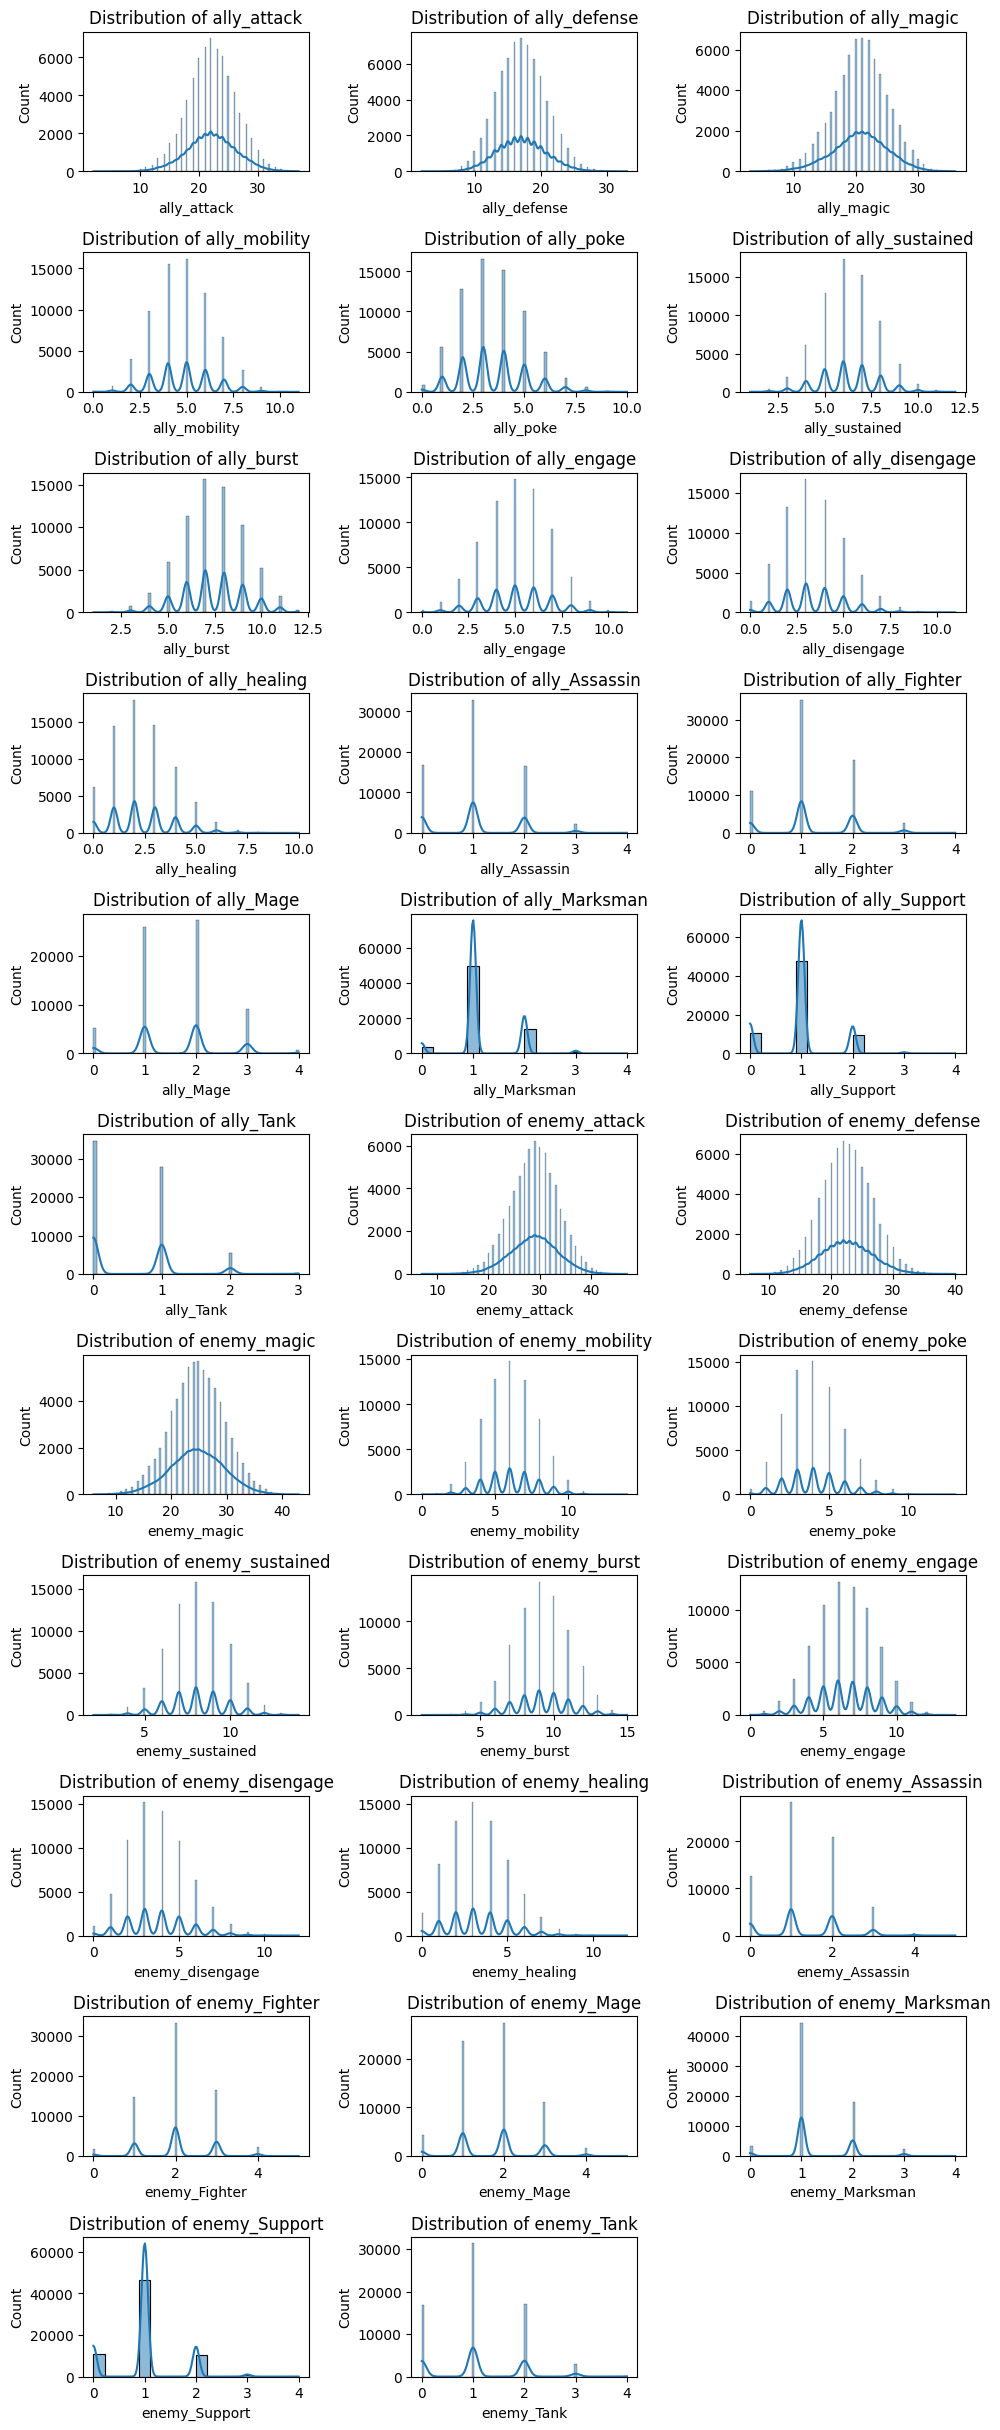

In [7]:
plot_feature_dist(features)

In [8]:
Y.value_counts()

win
1    36704
0    31671
Name: count, dtype: int64

In [25]:
#dataset is balanced, try out a basic model
#ML imports
import joblib
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, log_loss, roc_curve



In [29]:
def build_classifier(X, y, model="logreg", cv=2):
    '''
    X: feature df / indepent var
    y: target / dependent var (df column or 1d array)
    model: (string) model to use. Options: logreg, svm, dectree, rforest, nn
    '''

    if model == "logreg":
        classifier = LogisticRegression(solver="liblinear")
        param_grid = {
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'classifier__penalty': ['l1','l2'],
        }

    elif model == "svm":
        classifier = SVC(probability=True)
        param_grid = {
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto'],
        }

    elif model == "dectree":
        classifier = DecisionTreeClassifier()
        param_grid = {
            'classifier__max_depth': [2, 5, 10, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 5]
        }
    
    elif model == "rforest":
        classifier = RandomForestClassifier()
        param_grid = {
            'classifier__n_estimators': [100, 200, 500],
            'classifier__max_depth': [2, 5, 10, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 5]
        }

    elif model == "nn":
        classifier = MLPClassifier(max_iter=2000)
        param_grid = {
            'classifier__hidden_layer_sizes': [(100,)],
            'classifier__activation': ['relu'],
            'classifier__solver': ['sgd', 'adam'],
        }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier),
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')

    grid_search.fit(X_train, y_train)

    print("Best Parameters:")
    print(grid_search.best_params_)

    # Predict the labels using the best model
    y_pred = grid_search.predict(X_test)

    # Predict probabilities using the best model
    y_proba = grid_search.predict_proba(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC AUC Score:", roc_auc_score(y_test, y_proba[:,1]))

    print("Log Loss:", log_loss(y_test, y_proba))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba[:,1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return grid_search

Best Parameters:
{'classifier__C': 100, 'classifier__penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.09      0.15      9522
           1       0.54      0.92      0.68     10991

    accuracy                           0.53     20513
   macro avg       0.51      0.50      0.41     20513
weighted avg       0.51      0.53      0.43     20513

ROC AUC Score: 0.5239417689342778
Log Loss: 0.689899784594856


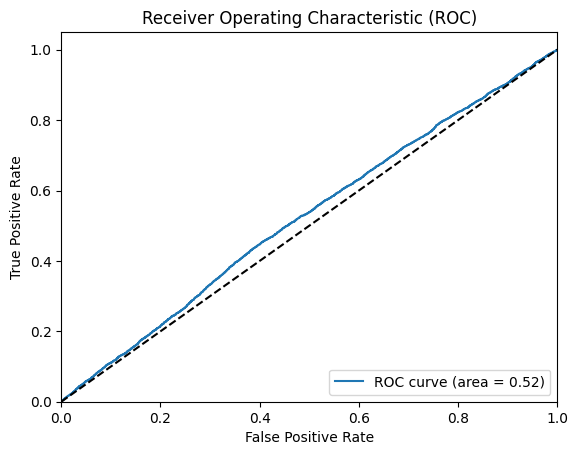

In [19]:
#log regression
log_reg = build_classifier(X=features, y=Y, model="logreg")

Best Parameters:
{'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.44      0.53      9522
           1       0.62      0.79      0.70     10991

    accuracy                           0.63     20513
   macro avg       0.64      0.62      0.61     20513
weighted avg       0.64      0.63      0.62     20513

ROC AUC Score: 0.6832772335105056
Log Loss: 0.6392305168934216


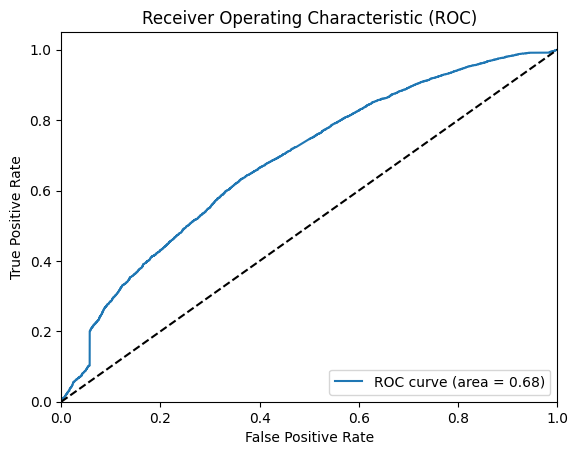

In [16]:
#SVM
svm = build_classifier(X=features, y=Y, model="svm")

Best Parameters:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      9522
           1       0.82      0.83      0.83     10991

    accuracy                           0.81     20513
   macro avg       0.81      0.81      0.81     20513
weighted avg       0.81      0.81      0.81     20513

ROC AUC Score: 0.8113703224484274
Log Loss: 6.752584213639021


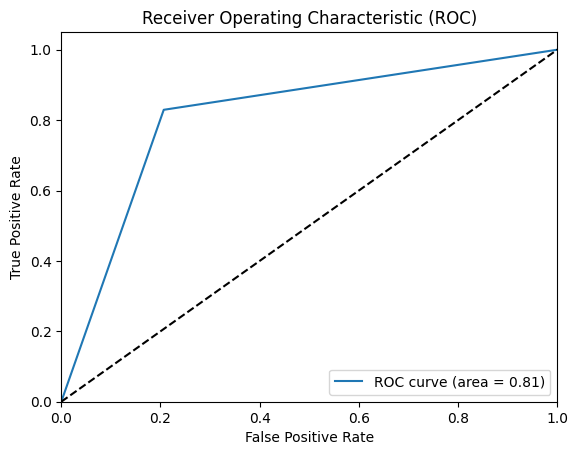

In [21]:
#dectree
decision_tree = build_classifier(X=features, y=Y, model="dectree")

Best Parameters:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      9522
           1       0.79      0.91      0.84     10991

    accuracy                           0.82     20513
   macro avg       0.83      0.81      0.82     20513
weighted avg       0.83      0.82      0.82     20513

ROC AUC Score: 0.9321048483062204
Log Loss: 0.39036469235359417


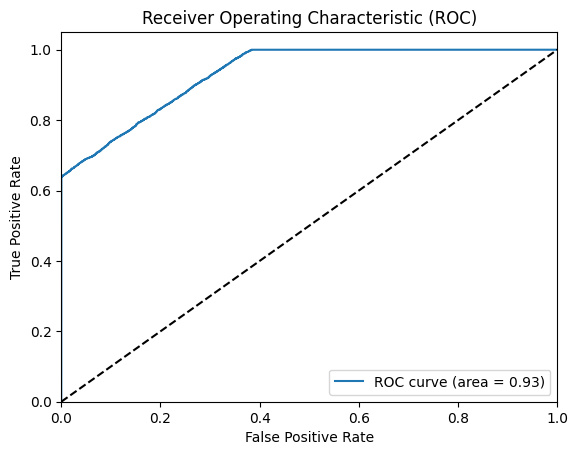

In [24]:
random_forest = build_classifier(X=features, y=Y, model="rforest")

Best Parameters:
{'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (100,), 'classifier__solver': 'adam'}
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      9522
           1       0.63      0.63      0.63     10991

    accuracy                           0.60     20513
   macro avg       0.60      0.60      0.60     20513
weighted avg       0.60      0.60      0.60     20513

ROC AUC Score: 0.6348745439142307
Log Loss: 0.7000292245550432


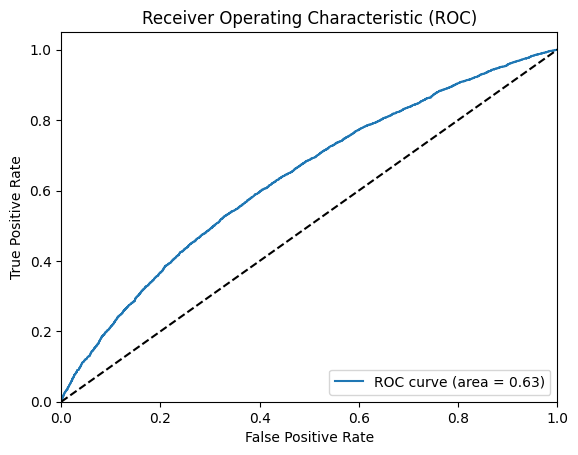

In [30]:
neural_net = build_classifier(X=features, y=Y, model="nn")

In [31]:
# random forest has the best initial results, lets examine failures
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=42) # same seed to get same vals
y_pred = random_forest.predict(X_test)

misclassified = np.where(y_test != y_pred)
misclassified_df = X_test.iloc[misclassified]

In [39]:
def compare_feature_avgs(df1, df2):
    '''
    Takes in 2 dataframes (of features), displays bar plot comparing the average of each feature.
    Used in this notebook for comparing the misclassified vs correctly classified feature averages.
    '''

    # Calculate the mean and standard deviation for each feature in the test set and misclassified instances
    means_correct = df1.mean()
    errors_correct = df1.std()

    means_misclassified = df2.mean()
    errors_misclassified = df2.std()

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Define the bar width
    bar_width = 0.35

    # Define the opacity for the bars
    opacity = 0.8

    # The x locations for the groups
    index = np.arange(len(means_correct))

    # Create bars for test set averages
    rects1 = ax.bar(index, means_correct, bar_width,
                    alpha=opacity, color='b',
                    yerr=errors_correct,
                    label='df1')

    # Create bars for misclassified instances averages
    rects2 = ax.bar(index + bar_width, means_misclassified, bar_width,
                    alpha=opacity, color='r',
                    yerr=errors_misclassified,
                    label='df2')

    # Add labels, title, legend, etc
    ax.set_xlabel('Features')
    ax.set_ylabel('Averages')
    ax.set_title('Feature averages between df1, df2')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(X_test.columns, rotation=90)  # Set the x-ticks to be the feature names
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

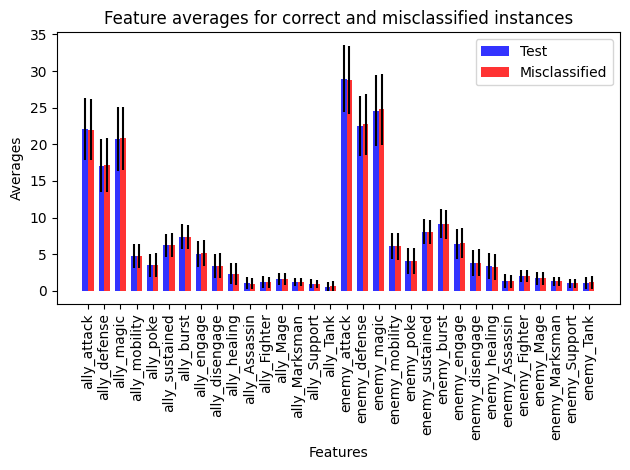

In [38]:
correct = np.where(y_test == y_pred)
classified_df = X_test.iloc[correct]

compare_feature_avgs(classified_df, misclassified_df)

In [41]:
#looks like the makeup of our features is not drastically different between correct and incorrect classifications, which is good

In [44]:
#lets try a model in tensorflow, for fun!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, 

In [56]:
def tf_ann_train(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.25),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dense(64, activation='mish'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=500, 
                        batch_size=32)
    
    return history, model

In [57]:
history, model = tf_ann_train(features, Y)

Epoch 1/500
1496/1496 [==============================] - 3s 1ms/step - loss: 0.6911 - accuracy: 0.5352 - auc: 0.5083 - val_loss: 0.6896 - val_accuracy: 0.5358 - val_auc: 0.5277
Epoch 2/500
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6891 - accuracy: 0.5390 - auc: 0.5297 - val_loss: 0.6887 - val_accuracy: 0.5388 - val_auc: 0.5434
Epoch 3/500
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6876 - accuracy: 0.5417 - auc: 0.5439 - val_loss: 0.6870 - val_accuracy: 0.5423 - val_auc: 0.5489
Epoch 4/500
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6851 - accuracy: 0.5515 - auc: 0.5588 - val_loss: 0.6876 - val_accuracy: 0.5445 - val_auc: 0.5478
Epoch 5/500
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6826 - accuracy: 0.5603 - auc: 0.5710 - val_loss: 0.6838 - val_accuracy: 0.5552 - val_auc: 0.5666
Epoch 6/500
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6788 - accuracy: 0.5680 - auc: 0.585

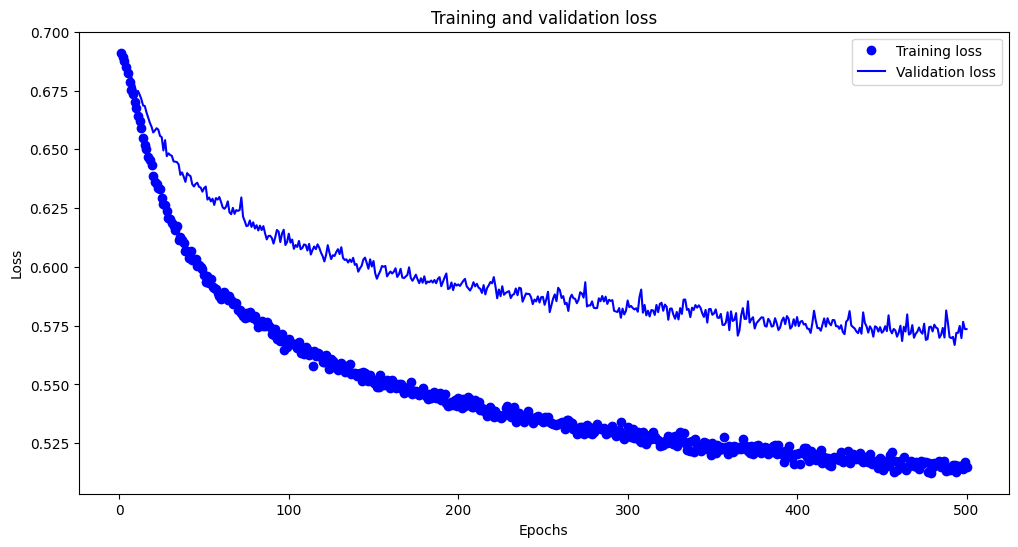

In [59]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
# Plot the losses
plt.figure(figsize=(12,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' -> blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' -> blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

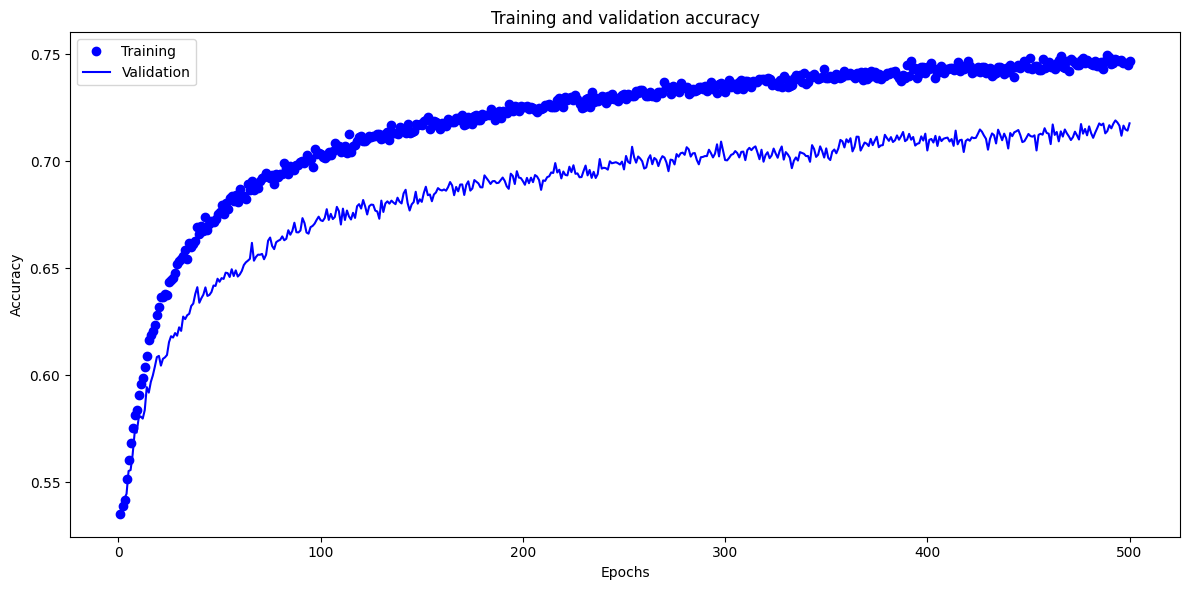

In [64]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
# Plot the accuracies
plt.figure(figsize=(12,6))
plt.plot(epochs, acc_values, 'bo', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()